In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculating Res-Permeability using Data : Well Test Analysis  (drawdown test)

   ### NumPy | Plotting | Domain Concepts | Reservoir-Engineering

## Pwf = Pi - m[log(t) + C]
    
    This equation comes from unsteady flow of compressible fluid

In [8]:
df=pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Petroleum-DS-ML-with-Python/main/Pt.csv')

In [10]:
df.head()

,time,pressure
0,0.0010,2743.96
1,0.0021,2737.52
2,0.0034,2730.16
3,0.0048,2722.32
4,0.0064,2713.83


## A. Cartesian Analysis : Tells what kind of test is it.

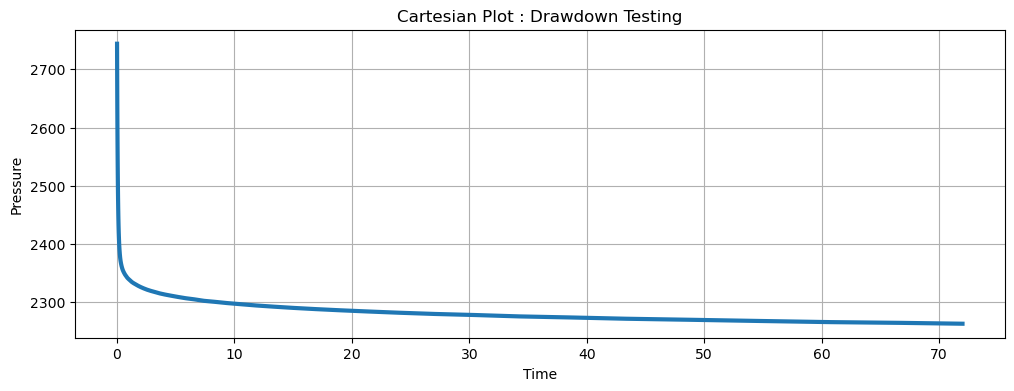

In [13]:
plt.style.use('default')
plt.figure(figsize=(12,4))
plt.plot(df['time'],df['pressure'],lw=3)
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Cartesian Plot : Drawdown Testing')
plt.grid()

## B. Semilog Analysis : High level searching for MTR.

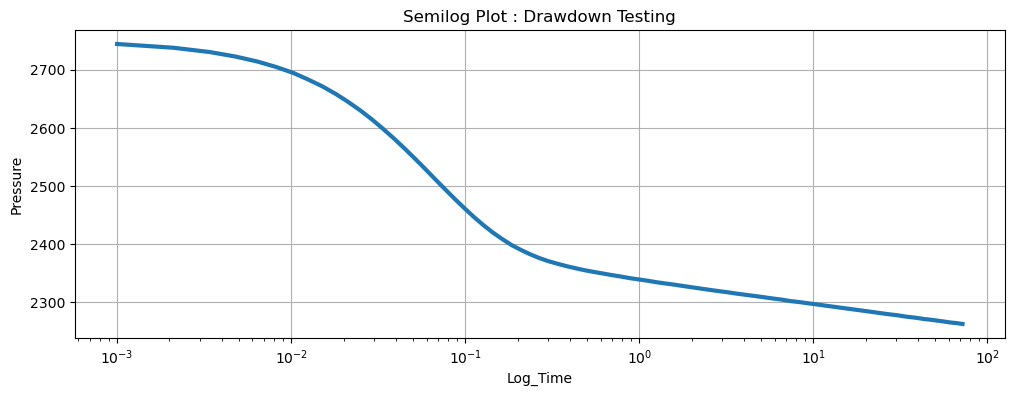

In [15]:
plt.style.use('default')
plt.figure(figsize=(12,4))
plt.semilogx(df['time'],df['pressure'],lw=3)
plt.xlabel('Log_Time')
plt.ylabel('Pressure')
plt.title('Semilog Plot : Drawdown Testing')
plt.grid()

## C. Log-Log Plot : Computations.

In [20]:
Pi = 2760 #psi Given

df['delP'] = np.abs(Pi - df['pressure'])

#note that np.diff(P) does what we call as 'dP' in 'dP/dt'. 
#But it reduces one element.
df['d(delP)'] = np.zeros(len(df))
df['d(delP)'].iloc[1:] = np.abs(np.diff(df['delP']))


df['dt'] = np.zeros(len(df))
df['dt'].iloc[1:] = np.diff(df['time'])


#P' (Pdash) = t*dP/dt
df['Pdash'] = np.zeros(len(df))
df['Pdash'].iloc[1:] = df['time']*df['d(delP)']/df['dt']


df.head()



,time,pressure,delp,d(delP),delP,dt,Pdash
0,0.0010,2743.96,16.04,0.00,16.04,0.0000,0.000000
1,0.0021,2737.52,22.48,6.44,22.48,0.0011,12.294545
2,0.0034,2730.16,29.84,7.36,29.84,0.0013,19.249231
3,0.0048,2722.32,37.68,7.84,37.68,0.0014,26.880000
4,0.0064,2713.83,46.17,8.49,46.17,0.0016,33.960000


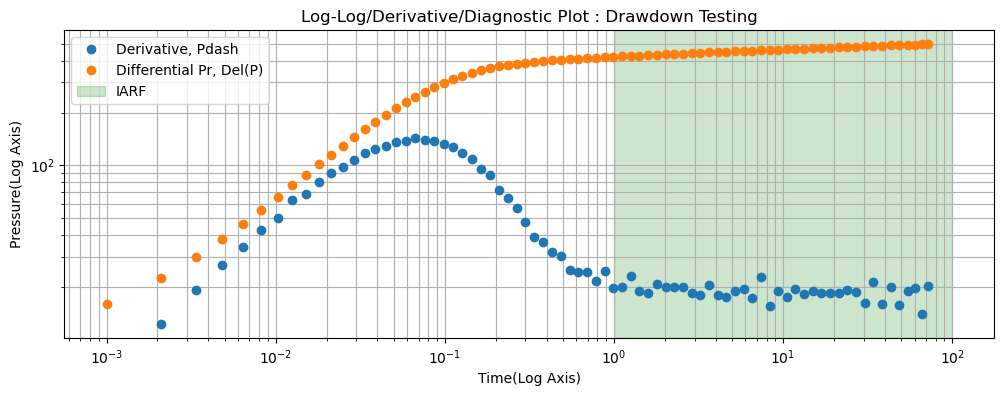

In [21]:


plt.style.use('default')
plt.figure(figsize=(12,4))

plt.loglog(df['time'], df['Pdash'],'o',label='Derivative, Pdash')
plt.loglog(df['time'], df['delP'],'o',label='Differential Pr, Del(P)')

plt.axvspan(1,100,color='green',alpha=0.2,label='IARF')

plt.xlabel('Time(Log Axis)') ; plt.ylabel('Pressure(Log Axis)')

plt.title('Log-Log/Derivative/Diagnostic Plot : Drawdown Testing')


plt.legend()
plt.grid(True, which="both")



In [22]:
tmin_iarf = 1 #hr
tmax_iarf = 50 #hrs

## D. Semi-Log Plot for IARF MTR only

In [23]:
df_semilog = df[(df['time']>=tmin_iarf) & (df['time'] <= tmax_iarf)]

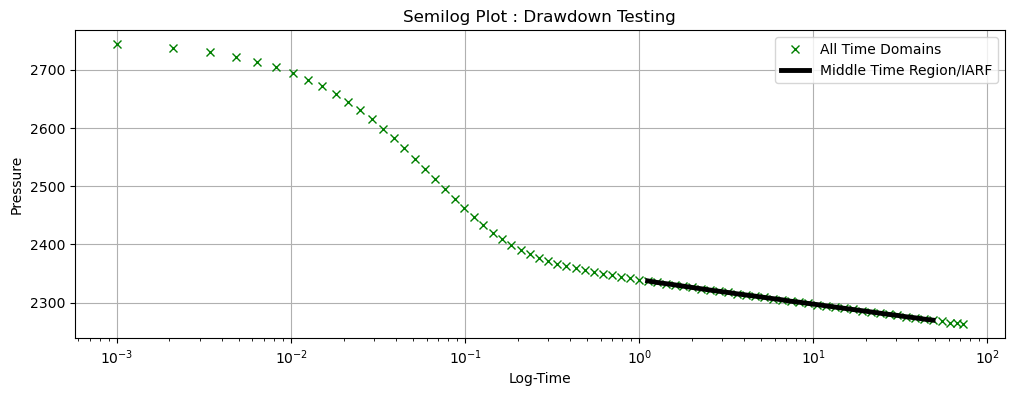

In [24]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.semilogx(df['time'], df['pressure'],'x',color='green',label='All Time Domains')
plt.semilogx(df_semilog['time'], df_semilog['pressure'],color='black',lw=3.5,label='Middle Time Region/IARF')

plt.xlabel('Log-Time') ; plt.ylabel('Pressure')

plt.title('Semilog Plot : Drawdown Testing')

plt.legend()
plt.grid()

## CONCLUSION : Finding Permeability

C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='pressure'>

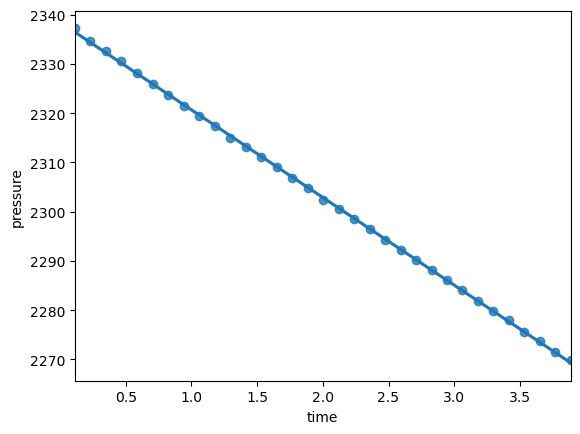

In [38]:
t = np.log(df_semilog['time'])
P = df_semilog['pressure']


sns.regplot(t,P)

In [26]:
#Polyfit
np.polyfit(t,P,1)

array([ -17.7869321 , 2338.42912687])

In [28]:
[slope,intercept]=np.polyfit(t,P,1)

In [29]:
abs(slope)

17.78693210498953

In [30]:
m = abs(slope)

[image.png](attachment:image.png)

In [31]:
q = 125 #stb/d
mu = 2.1 #cp
B = 1.14 #rb/Stb
h = 50 #ft

k = 162.6*q*mu/m/h

print(f'Formation Permeability is : {np.round(k,2)} miliDarcies')

Formation Permeability is : 47.99 miliDarcies


In [ ]:
s=1.51(((p1hr-pi)/m)-np.log(k/(fi*mu*ct*(rw**2)))+3.23)

##  Finding Skin Factor

In [43]:
p1hr=954
pi=1154
m=-22
k=89
fi=0.2
mu=3.93
ct=8.74*(10**-6)
rw=0.25

In [61]:
s=1.51*(((p1hr-pi)/m)-np.log10(k/(fi*mu*ct*(rw**2)))+3.23)

In [62]:
s

6.04654295122592

In [56]:
(p1hr-pi)/m

9.090909090909092

In [60]:
np.log10(k/(fi*mu*ct*(rw**2)))

8.316576010627026

In [59]:
(p1hr-pi)/m + 3.23 -8.3

4.020909090909091